# 堆叠条形图

### 1. 初始设置

首先，导入所需的库，并设置中文字体和定义颜色等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 读取数据

其次，从 Excel 文件中读取随机模拟的数据，并定于画图用的数据。

In [2]:
# 数据源路径
filepath='./data/用户评分占比2.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath, index_col='功能')

# 定义画图用的数据
category_names = df.columns
labels = df.index
data = df.values
data_cum = data.cumsum(axis=1)

### 3. 开始画图

接下来，开始用「**面向对象**」的方法进行画图。

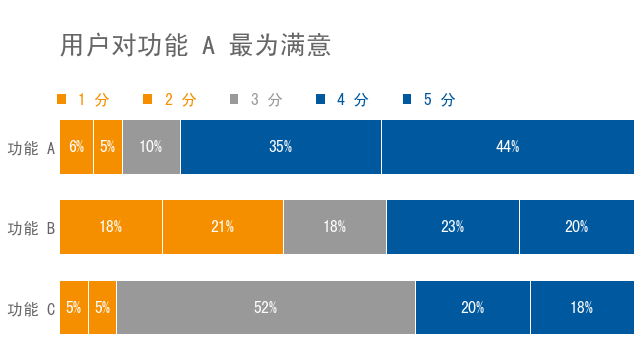

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax=plt.subplots(figsize=(9, 5))

# 设置标题
ax.set_title('\n用户对功能 A 最为满意\n\n', fontsize=26, loc='left', color=c['深灰色'])

# 倒转 Y 轴，让第一个功能排在最上面
ax.invert_yaxis()

# 隐藏 X 轴
ax.xaxis.set_visible(False)
# 设置 X 轴的范围
ax.set_xlim(0, np.sum(data, axis=1).max())

# 定义颜色
category_colors = [c['橙色'], c['橙色'], c['灰色'], c['蓝色'], c['蓝色']]

# 画堆叠水平条形图
for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.68, label=colname, color=color, edgecolor='w')
    xcenters = starts + widths / 2

    # 设置数据标签及其文字颜色
    text_color = 'w'
    for y, (x, d) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, '{:.0%}'.format(d), ha='center', va='center', color=text_color, fontsize=16)
        
# 显示图例
l = ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.03, 0.95),loc='lower left', 
              fontsize=16, frameon=False, handlelength=0.6)

#设置图例中文本的颜色
for i, text in zip(np.arange(len(l.get_texts())), l.get_texts()):
    if i < 2:
        text.set_color(c['橙色'])
    elif i < 3:
        text.set_color(c['灰色'])
    else:
        text.set_color(c['蓝色'])

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 隐藏 Y 轴的刻度线
ax.tick_params(axis='y', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

plt.show()